In [31]:
import os
import threading
import shutil
import time
import numpy as np
import pandas as pd
import cv2


In [7]:
import multiprocessing
numberOfCores = multiprocessing.cpu_count()
print(f"the number of cores are {numberOfCores}")

the number of cores are 4


In [8]:
image_width = 400
image_height = 400

In [9]:
inputdirname="input_images"
outputdirname="output_images"


In [24]:
def make_input_dir():    
    try:
        shutil.rmtree(inputdirname)
        os.mkdir(inputdirname)
    except:
        os.mkdir(inputdirname)
def make_output_dir():
    try:
        shutil.rmtree(outputdirname)
        os.mkdir(outputdirname)
    except:
        os.mkdir(outputdirname)

In [19]:
def create_multicolor(filename):
    random_image = np.random.randint(0, 256, (image_height, image_width, 3), dtype=np.uint8)
    random_image_path = os.path.join(inputdirname, f"{filename}.jpg")
    cv2.imwrite(random_image_path, random_image)

In [20]:
def convert_image(filename):
    image = cv2.imread(f"{inputdirname}/{filename}.jpg")
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_image_path = os.path.join(outputdirname, f"{filename}.jpg")
    cv2.imwrite(grayscale_image_path, grayscale_image)

In [21]:
activethreads=threading.active_count()
print(f"threads when no processing={activethreads}")

threads when no processing=6


In [27]:
def multithreading(num_of_images,num_threads):
    make_input_dir()
    starttime=time.time()
    for i in range(num_of_images):
        t = threading.Thread(target=create_multicolor , args=("test%d"%(i+1),))
        t.start()
        while True:
            if (threading.active_count()-activethreads+1<=num_threads):
                break
            time.sleep(1)
    while True:
        if (threading.active_count()==activethreads):
            break
    make_output_dir()
    for i in range(num_of_images):
        t = threading.Thread(target=convert_image , args=("test%d"%(i+1),))
        t.start()
        while True:
            if (threading.active_count()-activethreads+1<=numberOfCores):
                break
            time.sleep(1)
    while True:
        if (threading.active_count()==activethreads):
            break
    return time.time()-starttime
        # print(f"threads left {threading.active_count()-activethreads}")
    

In [48]:
images=[200,300,400,500]
threads=[1,2,3,4,5,6]

In [49]:
df = pd.DataFrame(columns=threads)

In [50]:
for image in images:
    temp = [multithreading(image,thread) for thread in threads]
    df.loc[image] = temp

# Print the resulting DataFrame
print(df)

              1           2          3          4          5          6
200  206.224513  103.279232  40.578961  21.553883  23.452534  10.600800
300  323.080392  156.288278  52.513790  34.142139  20.658899  16.727657
400  424.962498  211.567874  86.227588  45.443294  18.275227  21.708640
500  527.324054  293.190258  82.217623  40.263367  40.098245  28.338024


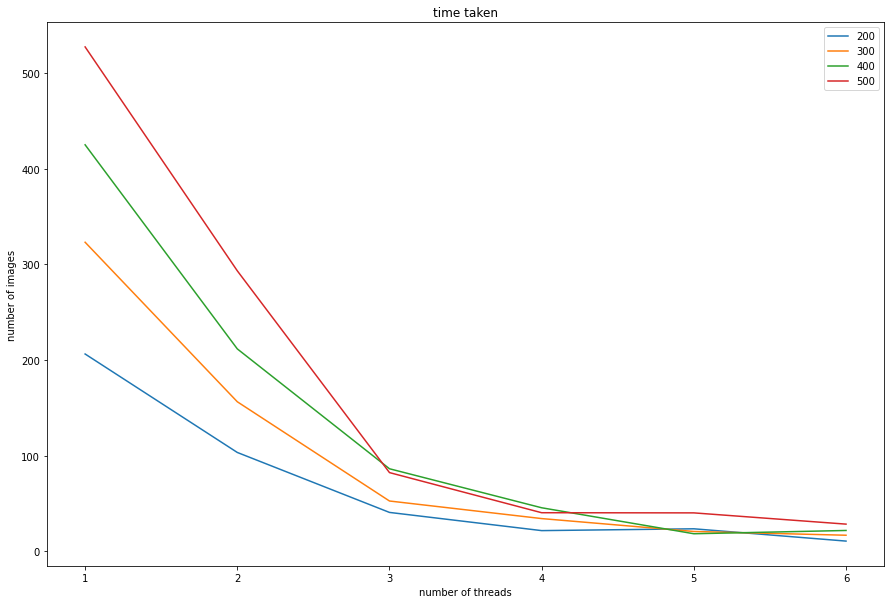

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for row in df.iterrows():
    label = row[0]
    values = row[1]
    plt.plot(df.columns, values, label=label)

# Add labels and title
plt.xlabel('number of threads')
plt.ylabel('number of images')
plt.title('time taken')

# Add legend
plt.legend()
file_name = "graph.png"  # Specify the desired file name and extension
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
folder_name=""
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)
# Display the plot
plt.show()







In [58]:
df.to_csv('time_taken.csv', index=False)

In [59]:
file_name = "graph.png"  
fig = plt.gcf()  
fig.set_facecolor('white')
plt.savefig(file_name)

<Figure size 432x288 with 0 Axes>